## Home Credit Default Risk

The data is provided by Home Credit, a service dedicated to provided lines of credit (loans) to the unbanked population.

Problem statement:
    
Building a model to predict how capable each applicant is of repaying a loan, so that sanctioning loan only for the applicants who are likely to repay the loan.

In [1]:
#install dependencies
!pip install kaggle

In [6]:
#upload the credentials of the kaggle account
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hrisavbhowmick","key":"863b9f3988aacb9da6a4c9e6955b83d1"}'}

In [7]:
#before importing the dataset we want to use this code
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
#outdated API Version, please consider updating -- handle error
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 3.1MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp36-none-any.whl size=73269 sha256=3268ac6a845627f7e871946b1f3cf7acb088f963ee2e3e41408abc9e558869a2
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [9]:
#import the dataset we want to use for our project
!kaggle competitions download -c home-credit-default-risk

 98% 673M/688M [00:19<00:00, 28.3MB/s]
100% 688M/688M [00:19<00:00, 37.0MB/s]


In [10]:
#lets see the imported files from kaggle competetion
!ls

home-credit-default-risk.zip  kaggle.json  sample_data


In [11]:
!unzip "/content/home-credit-default-risk.zip" -d "/content/home-credit-default-risk"

Archive:  /content/home-credit-default-risk.zip
  inflating: /content/home-credit-default-risk/HomeCredit_columns_description.csv  
  inflating: /content/home-credit-default-risk/POS_CASH_balance.csv  
  inflating: /content/home-credit-default-risk/application_test.csv  
  inflating: /content/home-credit-default-risk/application_train.csv  
  inflating: /content/home-credit-default-risk/bureau.csv  
  inflating: /content/home-credit-default-risk/bureau_balance.csv  
  inflating: /content/home-credit-default-risk/credit_card_balance.csv  
  inflating: /content/home-credit-default-risk/installments_payments.csv  
  inflating: /content/home-credit-default-risk/previous_application.csv  
  inflating: /content/home-credit-default-risk/sample_submission.csv  


In [12]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [13]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Application Train

In [14]:
app_train = pd.read_csv('/content/home-credit-default-risk/application_train.csv')
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
app_train.shape

(307511, 122)

In [6]:
for col in app_train.columns: 
    print(col)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

In [ ]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,...,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,...,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,...,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,

In [ ]:
app_train.describe(include=[object])

In [ ]:
def missing_vals(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count()*100)
    return pd.concat([total,percent], axis=1, keys=['Total','Percent'])

In [ ]:
missing_vals(app_train).head()

### Univariate Analysis

### TARGET Column

In [19]:
app_train['TARGET'].isnull().sum()

0

Text(0.5, 1.0, 'Application loans - Repayed & Not Repayed')

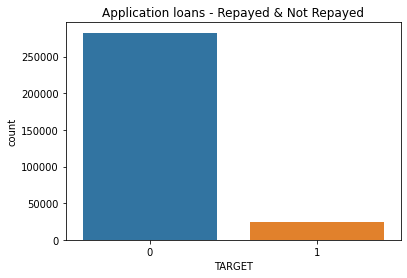

In [20]:
sns.countplot(app_train['TARGET'])
plt.title('Application loans - Repayed & Not Repayed')

Clearly shows we have an imbalanced target. Majority of them have repayed the loan.

### Categorical Columns

In [21]:
app_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

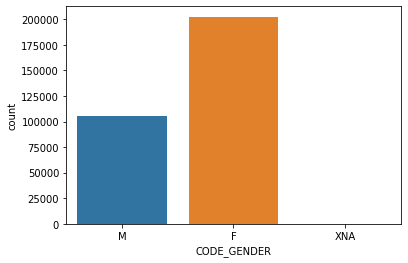

In [22]:
sns.countplot(app_train['CODE_GENDER'])

Majority of the applicants (almost double) are females.

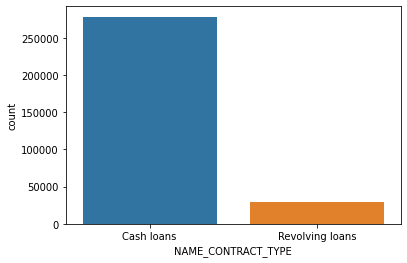

In [23]:
sns.countplot(app_train['NAME_CONTRACT_TYPE'])

A revolving loan is a form of credit that provides the borrower with the ability to withdraw, repay, and withdraw again. Cash loan is one time payment. Here majority of the loans is Cash Loan type.

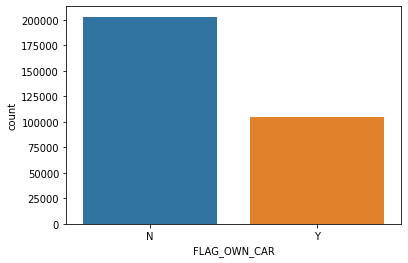

In [29]:
sns.countplot(app_train['FLAG_OWN_CAR'])

Applicants who doesn't own a car is almost double to the ones that own one.

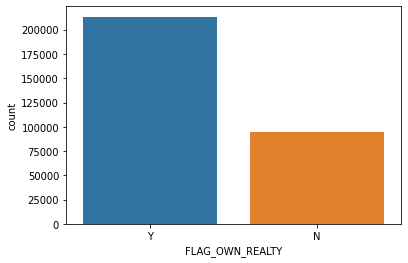

In [30]:
sns.countplot(app_train['FLAG_OWN_REALTY'])

Applicants who owns real estate is more than double to the ones that doesn't own one.

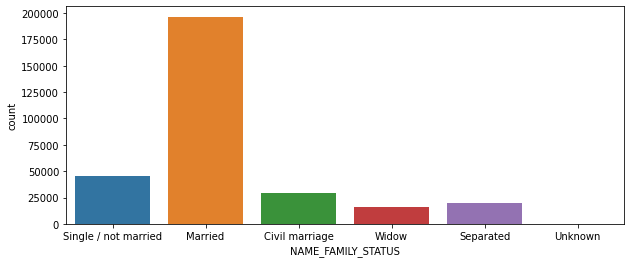

In [24]:
plt.figure(figsize=(10,4))
sns.countplot(app_train['NAME_FAMILY_STATUS'])

Most of the applicants is Married. Also the number of applicants who are separated is more than applicants who are widowed.

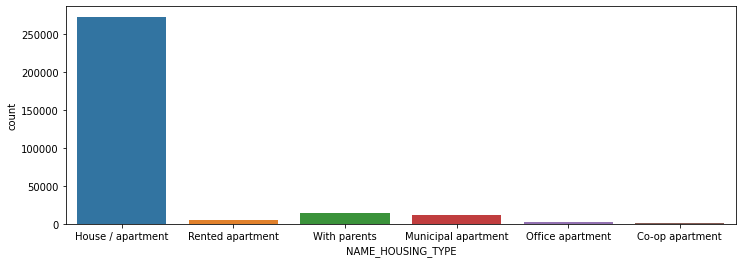

In [25]:
plt.figure(figsize=(12,4))
sns.countplot(app_train['NAME_HOUSING_TYPE'])

Most of the applicants have their own house/apartment.

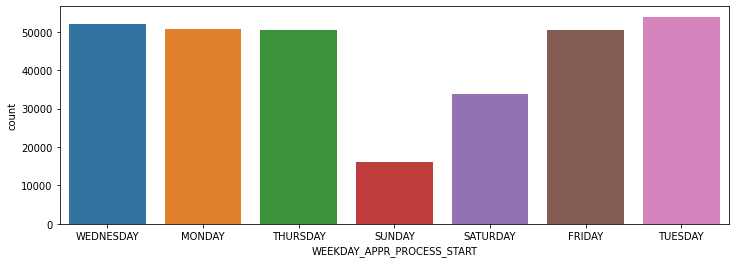

In [5]:
plt.figure(figsize=(12,4))
sns.countplot(app_train['WEEKDAY_APPR_PROCESS_START'])

Majority of the applicants have applied for loan on Tuesday. Sunday has seen least number of applicants (generaly banks are closed on Sundays).

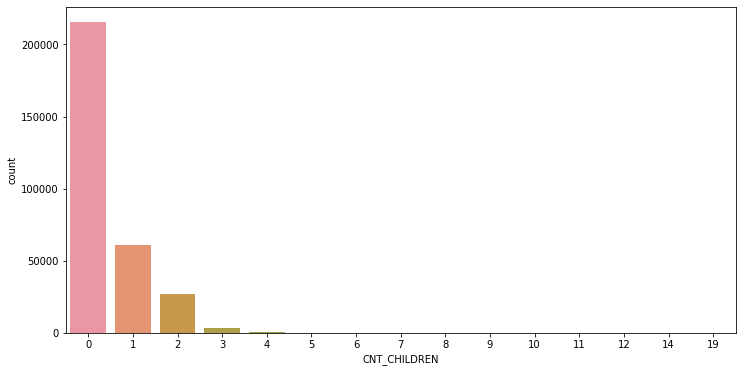

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(app_train['CNT_CHILDREN'])

Majority of applicants have no children. 

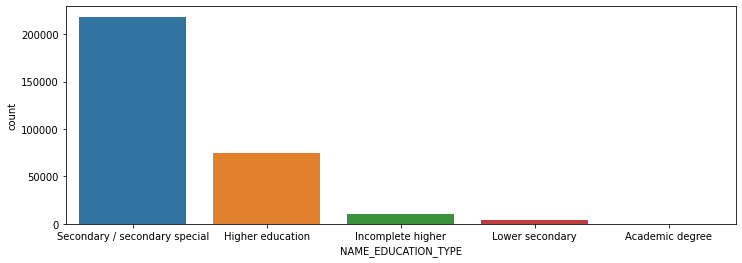

In [37]:
plt.figure(figsize=(12,4))
sns.countplot(app_train['NAME_EDUCATION_TYPE'])

Most of the applicants have done secondary education (till schooling gets over). Around 25% applicants have done till some kind of higher education.

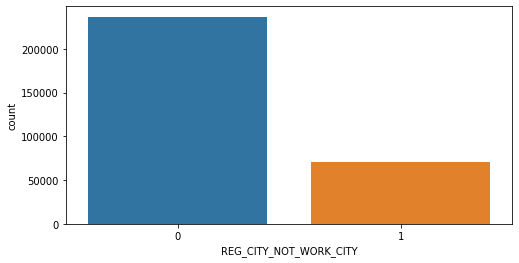

In [38]:
plt.figure(figsize=(8,4))
sns.countplot(app_train['REG_CITY_NOT_WORK_CITY'])

More than 75% of the applicants work in the same city as registered

### Numerical Columns

In [21]:
def plot_univariate(data,feature):
    plt.figure(figsize=(9,4))
    plt.title("Distribution of %s" %feature)
    sns.distplot(data[feature].dropna())
    plt.show()  

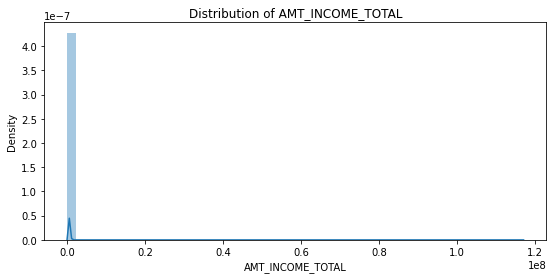

In [8]:
plot_univariate(app_train, 'AMT_INCOME_TOTAL')

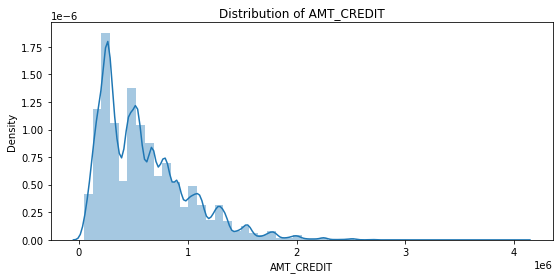

In [7]:
plot_univariate(app_train, 'AMT_CREDIT')

Majority of the loan amount for applicants within 10 lakhs.

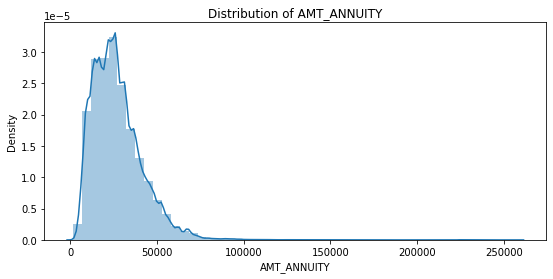

In [9]:
plot_univariate(app_train, 'AMT_ANNUITY')

Annuity plan provides periodic payments for a term that you have chosen, for the amount that you pay as premiums. Here majority of annuity lies within 50 thousand.

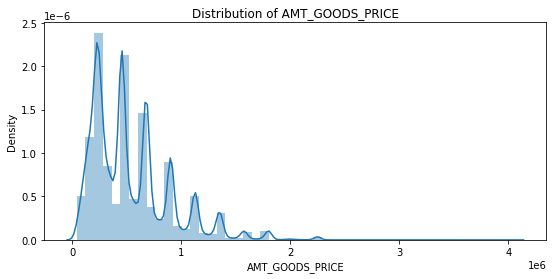

In [10]:
plot_univariate(app_train, 'AMT_GOODS_PRICE')

It is the price of the goods for which loan is given which is mostly within 10 lakhs.

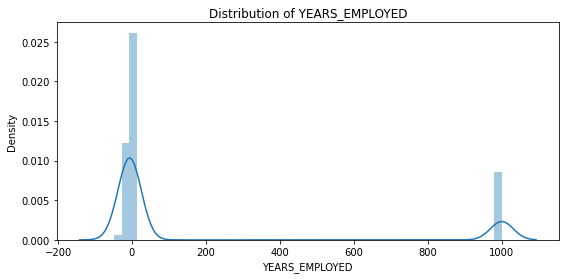

In [24]:
app_train['YEARS_EMPLOYED']=app_train['DAYS_EMPLOYED']/365
plot_univariate(app_train, 'YEARS_EMPLOYED')

It shows some of the applicants are employed since near around 1000 years, which might be an erroneous value.

# Bivariate Analysis

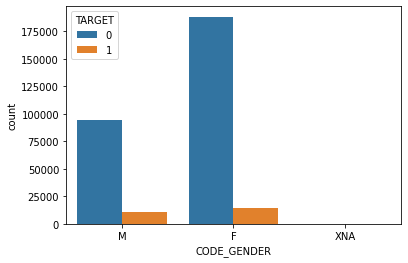

In [11]:
sns.countplot(x=app_train['CODE_GENDER'], hue=app_train['TARGET'])

The ratio of Females repaying their loan is higher compared to Males.

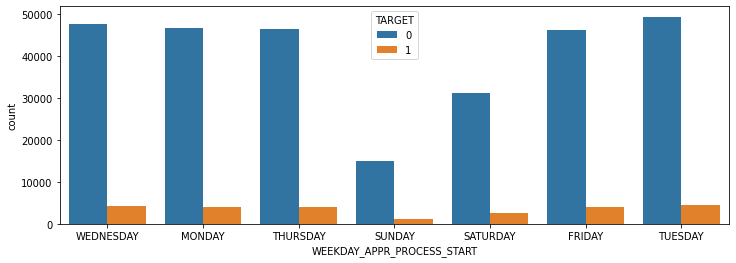

In [12]:
plt.figure(figsize=(12,4))
sns.countplot(x=app_train['WEEKDAY_APPR_PROCESS_START'], hue=app_train['TARGET'])

Most of the loans are repayed on Tuesday and least on Sunday.

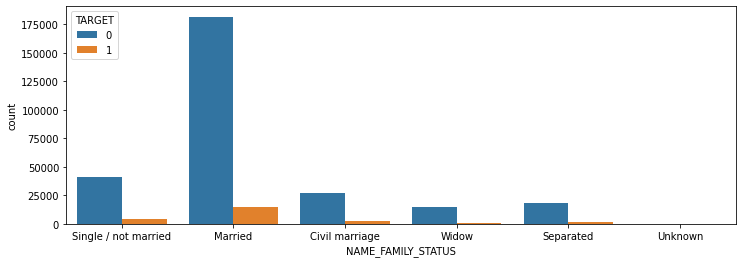

In [13]:
plt.figure(figsize=(12,4))
sns.countplot(x=app_train['NAME_FAMILY_STATUS'], hue=app_train['TARGET'])

Most of the applicant who have repayed their loan is Married.

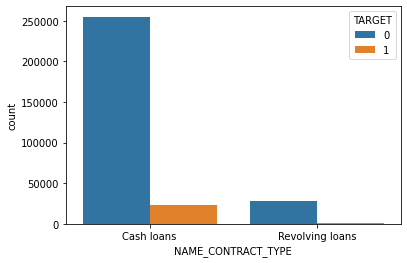

In [14]:
sns.countplot(x=app_train['NAME_CONTRACT_TYPE'], hue=app_train['TARGET'])

Applicants who applied for Cash Loans and have repayed it is much higher than those who took revolving loans and repayed it.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

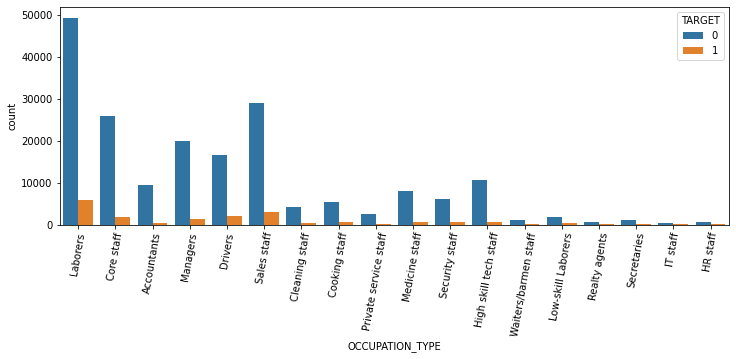

In [15]:
plt.figure(figsize=(12,4))
sns.countplot(x=app_train['OCCUPATION_TYPE'], hue=app_train['TARGET'])
plt.xticks(rotation=80)

Among those who repays their loans, Laborers sit at the top.

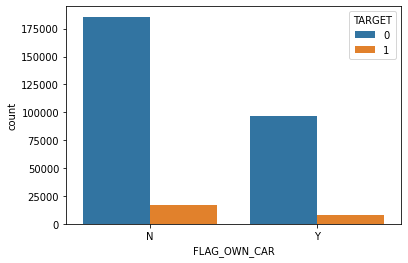

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x=app_train['FLAG_OWN_CAR'], hue=app_train['TARGET'])

Most of the applicants who have repayed the loan do not own any car.

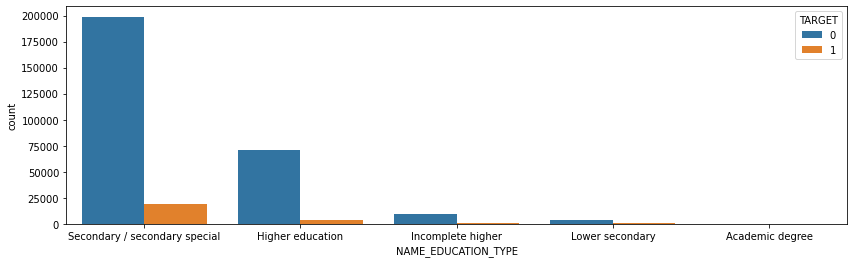

In [22]:
plt.figure(figsize=(14,4))
sns.countplot(x=app_train['NAME_EDUCATION_TYPE'], hue=app_train['TARGET'])

Applicants with secondary education are highest in both the categories - loan repayment and loan not repayment.

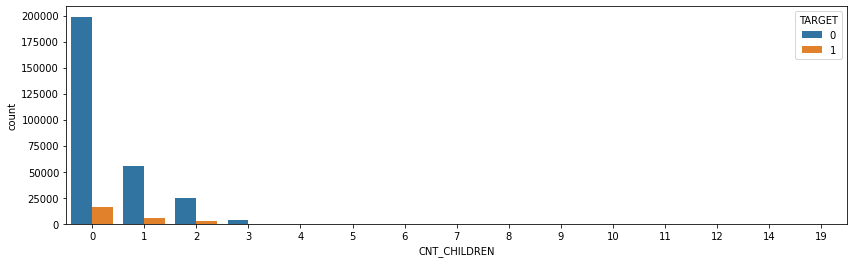

In [23]:
plt.figure(figsize=(14,4))
sns.countplot(x=app_train['CNT_CHILDREN'], hue=app_train['TARGET'])

Applicants with no children are highest in both the categories - loan repayment and loan not repayment.

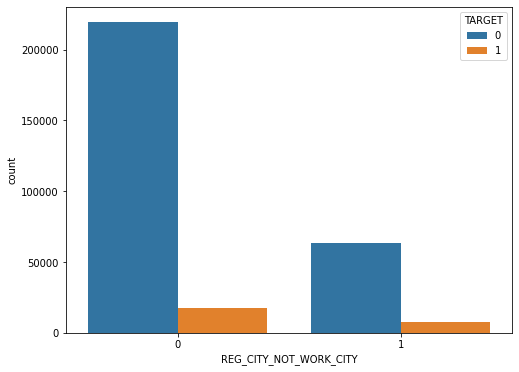

In [35]:
plt.figure(figsize=(8,6))
sns.countplot(x=app_train['REG_CITY_NOT_WORK_CITY'], hue=app_train['TARGET'])

In [26]:
#visualizing the Probability Density of continuous variables

def plot_bivariate(df,col):
  fig = plt.figure(figsize = (8,4))
  target_1 = np.where(df['TARGET']==1)
  target_0 = np.where(df['TARGET']==0)
  sns.kdeplot(df[col].iloc[target_1], label = 'Loan Not Repayed')
  sns.kdeplot(df[col].iloc[target_0], label = 'Loan Repayed')
  plt.legend()

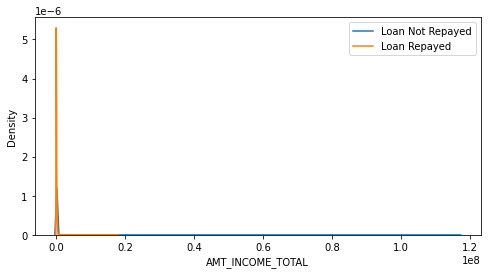

In [51]:
plot_bivariate(app_train, 'AMT_INCOME_TOTAL')

Income of majority of the applicants 

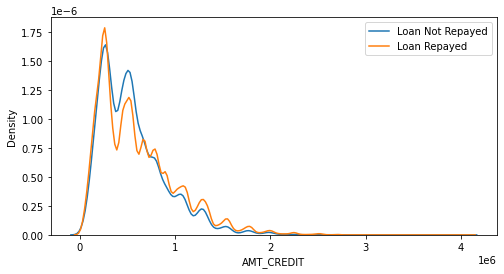

In [52]:
plot_bivariate(app_train, 'AMT_CREDIT')

It shows the distribution of loan amount for those who repayed vs those who not repayed.

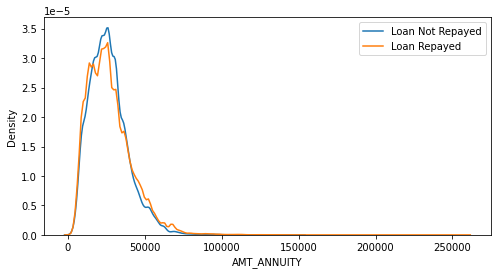

In [49]:
plot_bivariate(app_train, 'AMT_ANNUITY')

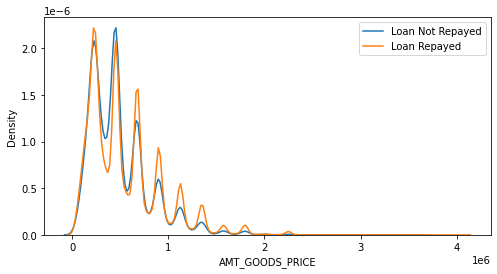

In [50]:
plot_bivariate(app_train, 'AMT_GOODS_PRICE')

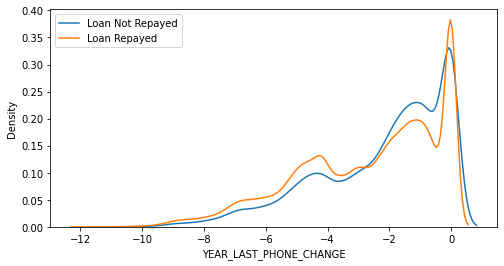

In [59]:
app_train['YEAR_LAST_PHONE_CHANGE']=app_train['DAYS_LAST_PHONE_CHANGE']/365
plot_bivariate(app_train, 'YEAR_LAST_PHONE_CHANGE')

Majority of the applicants have changed their phone in last 1 year.

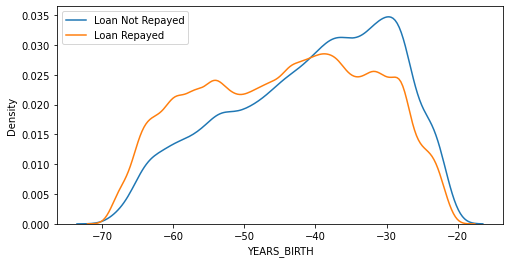

In [27]:
app_train['YEARS_BIRTH']=app_train['DAYS_BIRTH']/365
plot_bivariate(app_train, 'YEARS_BIRTH')

Majority of people who have repayed their loan falls around the age of 25 to 60. But people who have not repayed their loan are mainly the young ones. It shows older applicants repays their loan faster.

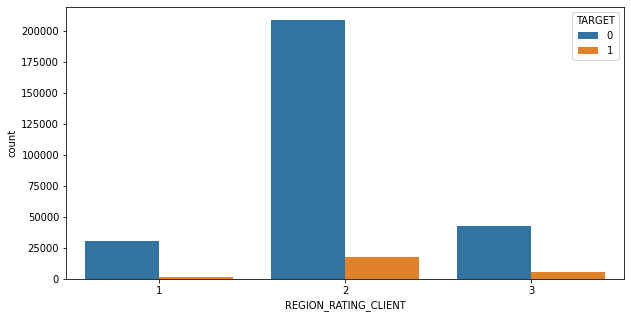

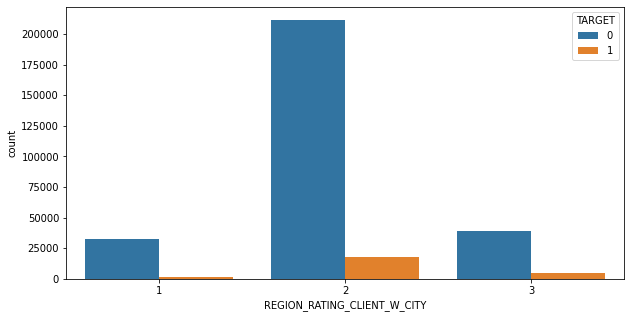

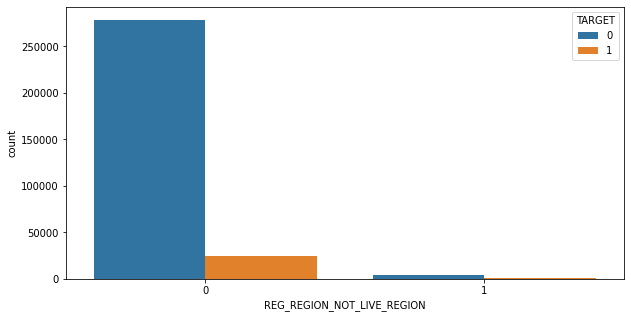

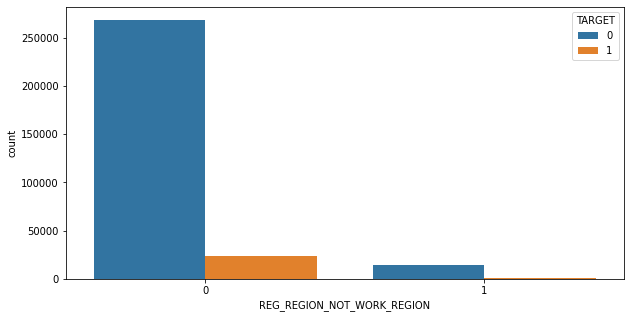

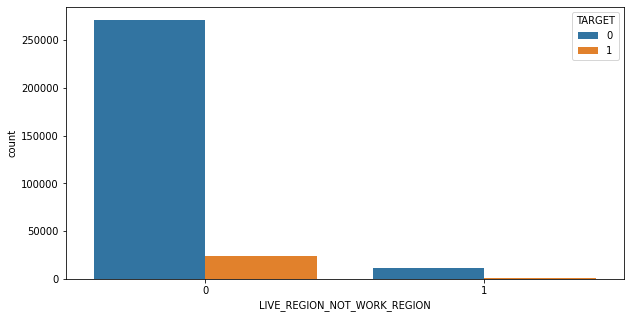

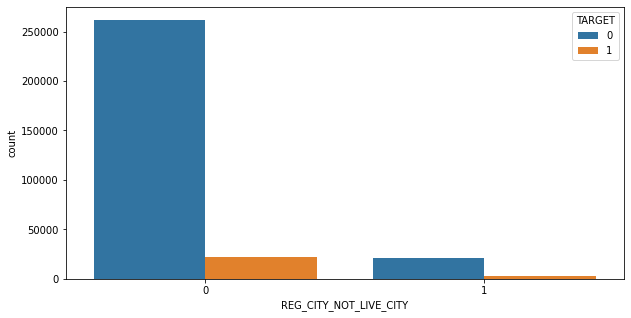

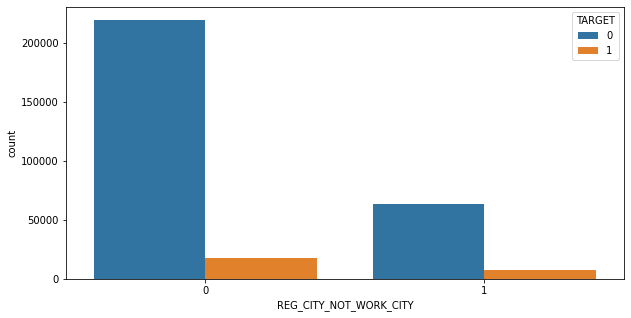

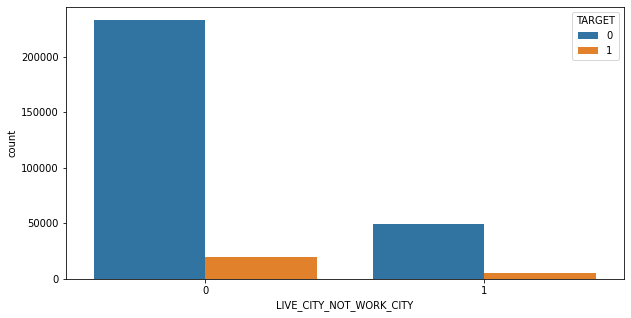

In [41]:
selected_features = ['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']


for i in selected_features:
    plt.figure(figsize = (10,5))
    sns.countplot(app_train[i],hue=app_train['TARGET'])
    plt.show()

In [28]:
corr_train = app_train.corr()['TARGET']
print(corr_train.sort_values().head(10))
print(corr_train.sort_values().tail(10))

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
YEARS_EMPLOYED               -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
Name: TARGET, dtype: float64
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
YEARS_BIRTH                    0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64


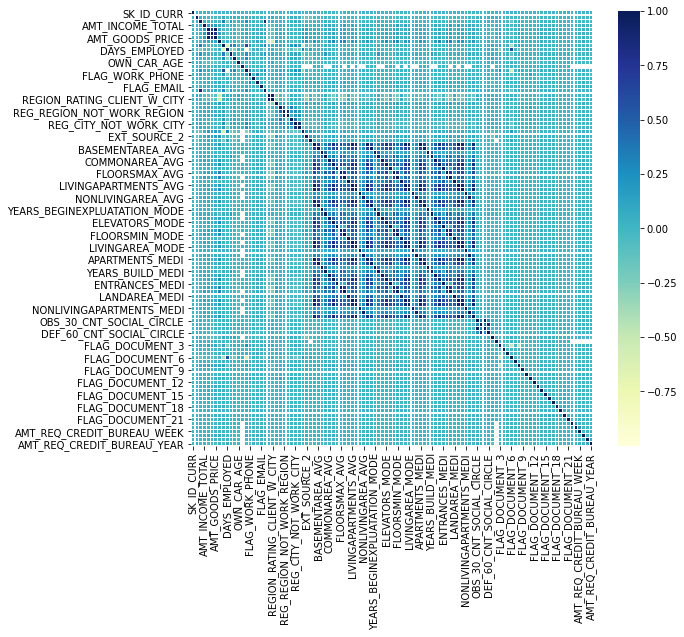

In [15]:
corrmat = app_train.corr() 

f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 


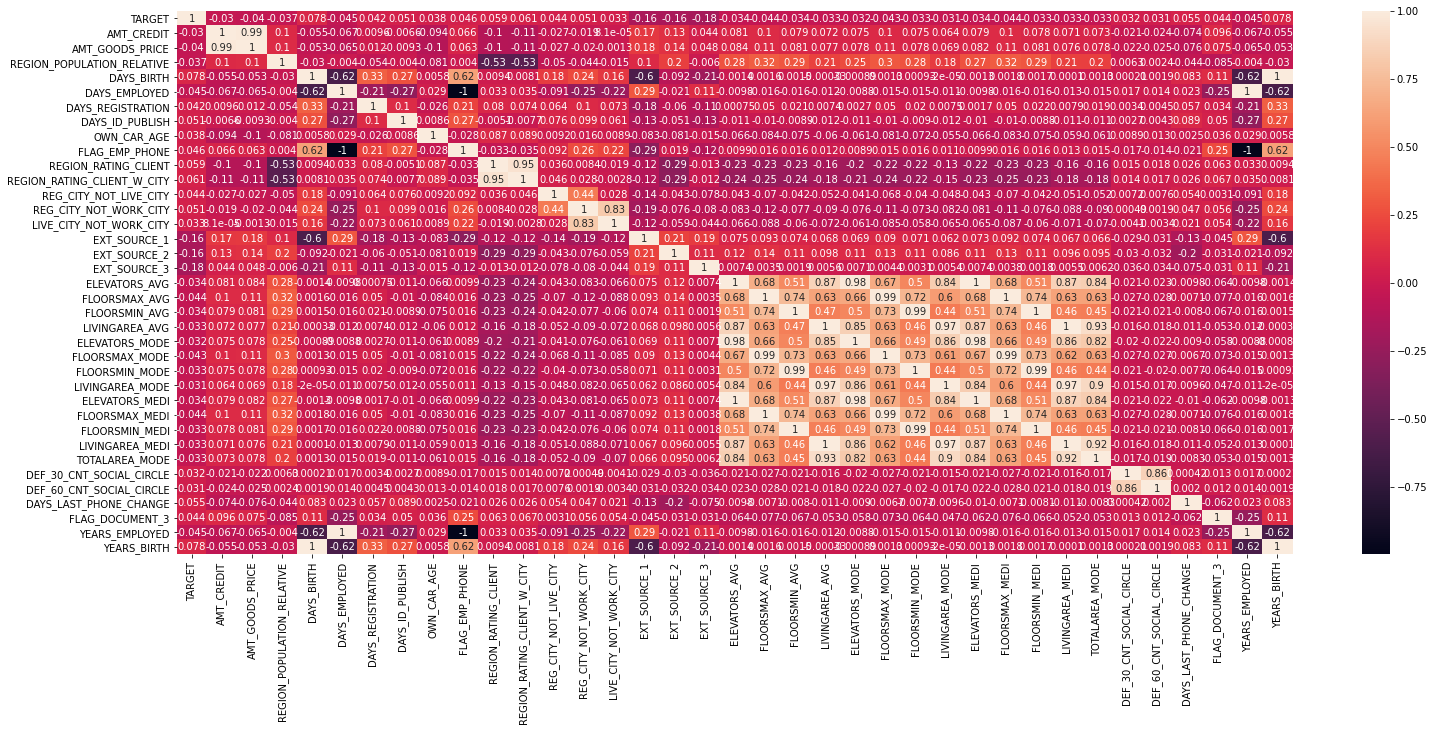

In [43]:
corrmat = app_train.corr() #returns correlation matrix
top_corr_features = corrmat.index[abs(corrmat["TARGET"])>=0.03]
plt.figure(figsize=(25,10))
sns.heatmap(app_train[top_corr_features].corr(),annot=True)

<Figure size 1440x1440 with 0 Axes>

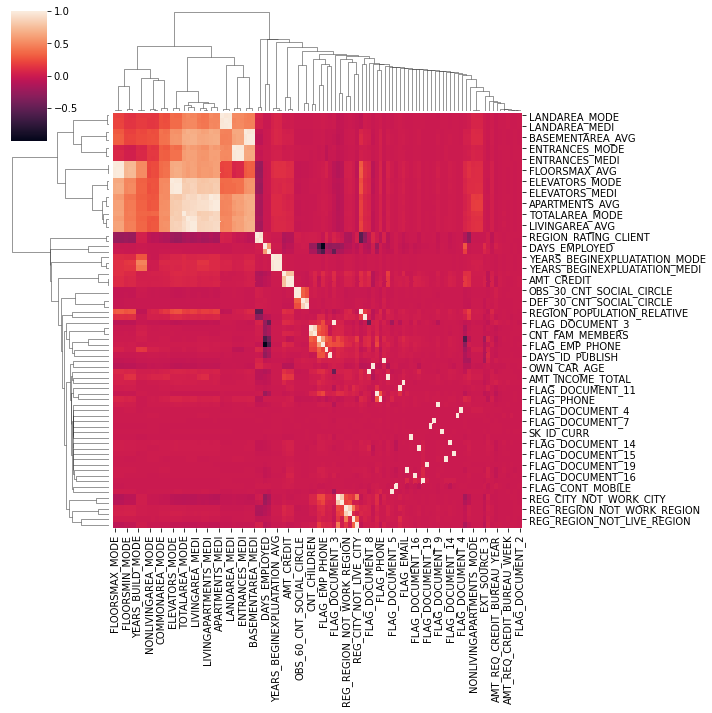

In [33]:
plt.figure(figsize=(20,20))
sns.clustermap(corrmat.dropna())
plt.show()

In [ ]:
ddff_combined =ddf_combined[['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE', 'DAYS_BIRTH']]
sns.pairplot(ddff_combined)